

# CSCI 3202, Spring 2020:  Assignment 5
### Due:  Friday 17 April 2020 by 11:59 PM

### Your name:

---



---
## Problem 1: Navigating an awkward situation with grace and poise

<img src='https://www.explainxkcd.com/wiki/images/5/5f/interaction.png' style="width: 600px;"/>


Suppose you are at a social event where you would like to avoid any interaction with a large number of the other attendees. It's not that you don't like them, it's just that you don't like *talking to* them. A few of your good friends are also in attendance, but they are tucked away in a corner. The rectangular room in which the event is being held spans gridcells at $x=1,2,\ldots, 6$ and $y=1,2,\ldots, 5$. At the eastern edge ($x=6$) of this first floor room, there is a balcony, with a 6-foot drop. If the event becomes unbearably awkward, you can jump off the balcony and run away. Of course, this might hurt a little bit, so we should incorporate this into our reward structure.

The terminal states and rewards associated with them are given in the diagram below. The states are represented as $(x,y)$ tuples. The available actions in non-terminal states include moving exactly 1 unit North (+y), South (-y), East (+x) or West (-x), although you should not include walking into walls, because that would be embarrassing in front of all these other people. Represent actions as one of 'N', 'S', 'E', or 'W'. For now, assume all non-terminal states have a default reward of -0.01, and use a discount factor of 0.99.

<img src="http://www.cs.colorado.edu/~tonyewong/home/resources/hw06_mdp.png" style="width: 400px;"/>

Use the following transition model for this decision process, if you are trying to move from state $s$ to state $s'$:
* you successfully move from $s$ to $s'$ with probability 0.6
* the remaining 0.4 probability is spread equally likely across state $s$ **and** all adjacent (N/S/E/W) states except for $s'$. Note that this does not necessarily mean that all adjacent states have 0.1, because some states do not have 4 adjacent states.


### (1a)

Complete the `MDP` class below. The docstring comments provide some desired specifications. You may add additional methods or attributes, if you would like.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import unittest

In [2]:
class MDP:
    def __init__(self, nrow, ncol, terminal, default_reward, discount):
        '''Create/store the following attributes:
        states -- list of all the states (x,y) tuples
        terminal_states -- is a dictionary with terminal state keys, and rewards as values
        default_reward -- is the reward for being in any non-terminal state
        df -- discount factor
        ... and anything else you decide will be useful!
        '''
        
        # your code goes here...
        
        # Solution:
        
        self.nrow = nrow
        self.ncol = ncol
        self.states = [(x,y) for x in range(1,ncol+1) for y in range(1,nrow+1)]
        self.terminal_states = terminal
        self.default_reward = default_reward
        self.df = discount

    def actions(self, state):
        '''Return a list of available actions from the given state.
        [None] are the actions available from a terminal state.
        '''
        
        # your code goes here...
        
        # Solution:
        
        if state in self.terminal_states:
            return [None]
        else:
            moves = []
            if state[0] > 1:
                # can move West
                moves.append('W')
            if state[0] < self.ncol:
                # can move East
                moves.append('E')
            if state[1] > 1:
                # can move South
                moves.append('S')
            if state[1] < self.nrow:
                # can move North
                moves.append('N')
            
            return moves
        
    def reward(self, state):
        '''Return the reward for being in the given state'''
        
        # your code goes here...
        
        # Solution:
        
        return self.terminal_states[state] if state in self.terminal_states.keys() else self.default_reward
        
    def result(self, state, action):
        '''Return the resulting state (as a tuple) from doing the given
        action in the given state, without uncertainty. Uncertainty
        is incorporated into the transition method.
        state -- a tuple representing the current state
        action -- one of N, S, E or W, as a string
        '''
    
        # your code goes here...
        
        # Solution:
        
        assert action in self.actions(state), 'Error: action needs to be available in that state'
        assert state in self.states, 'Error: invalid state'
    
        if action=='N':
            new_state = (state[0], state[1]+1)
        elif action=='S':
            new_state = (state[0], state[1]-1)
        elif action=='E':
            new_state = (state[0]+1, state[1])
        elif action=='W':
            new_state = (state[0]-1, state[1])
        
        return new_state
                
    def transition(self, state, action):
        '''Return the probabilities and subsequent states associated
        with taking the given action from the given state. Can be done
        however you want, so that it works with your value/policy iteration.
        '''
        
        # your code goes here...
        
        # Solution:
        
        if action is None:
            return [(0, state)]
        else:
            all_actions = self.actions(state)
            p_success = 0.6
            p_fail = (1-p_success)/len(all_actions) # not -1 in denominator because we always TRY to go somewhere, it's just sometimes we can't
            prob_state = [(-1,-1)]*(len(all_actions)+1)
            prob_state[0] = (p_success, self.result(state, action))
            all_actions.remove(action)
            prob_state[1] = (p_fail, state)
            for k in range(2,len(all_actions)+2):
                prob_state[k] = (p_fail, self.result(state, all_actions.pop()))
            return prob_state

**Now:** create an `MDP` object to represent the decision process in this problem.

To test and get comfortable with your `MDP` class methods and attributes, and making the relevant calculations with this structure, calculate the expected utility of walking north from (1,1). Assume initially that all states $(x,y)$ have a utility of $x+y$ (including the terminal states).

In [3]:
# Solution:

nrow = 5
ncol = 6
default_reward = -0.01
discount = 0.99
terminal = {(1,3):-1, (1,4):2, (1,5):2, (2,1):-1, (3,1):-1, (3,4):-1, (3,5):1,
            (4,3):-1, (4,4):-1, (6,1):-5, (6,2):-5, (6,3):-5, (6,4):-5, (6,5):-5}
mdp = MDP(nrow, ncol, terminal, default_reward, discount)

# The expected utility of walking N from (1,1):
util_old = {s : s[0]+s[1] for s in mdp.states}
next_states = mdp.transition((1,1), 'N')

exp_util = sum([next_states[j][0]*util_old[next_states[j][1]] for j in range(len(next_states))])
print('Expected utility of ((1,1), N) is: {}'.format(exp_util))

Expected utility of ((1,1), N) is: 2.8


#### Unit tests
Note that these are non-exhaustive, because there is some flexibility in how the `transition` method works.

In [6]:
tests_to_run = unittest.TestLoader().loadTestsFromModule(Tests_Problem1())
unittest.TextTestRunner().run(tests_to_run)

......
----------------------------------------------------------------------
Ran 6 tests in 0.004s

OK


<unittest.runner.TextTestResult run=6 errors=0 failures=0>

### (1b)

Implement value iteration to calculate the utilities for each state.  Also implement a function that takes as arguments an `MDP` object and a dictionary of state-utility pairs (key-value) and returns a dictionary for the optimal policy.  The optimal policy dictionary should have state tuples as keys and the optimal move (None, N, S, E or W) as values.

In [7]:
def value_iteration(mdp, tol=1e-3):
    
    # your code goes here...
    
    # Solution:
    
    # initilize utility for all states
    util_new = {s : 0 for s in mdp.states}
    while True:
        util_old = util_new.copy()
        max_change = 0
        for s in mdp.states:
            next_states = [mdp.transition(s, a) for a in mdp.actions(s)]
            best_util = -999
            for k in range(len(next_states)):
                exp_util = sum([next_states[k][j][0]*util_old[next_states[k][j][1]] for j in range(len(next_states[k]))])
                best_util = max(best_util, exp_util)
            util_new[s] = mdp.reward(s) + mdp.df*best_util
            max_change = max(max_change, abs(util_new[s]-util_old[s]))
        if (mdp.df==1 and max_change < tol) or max_change < tol*(1-mdp.df)/mdp.df:
            break
    return util_new

def find_policy(mdp, utility):
    
    # your code goes here...
    
    # Solution:
    
    policy = {s : None for s in mdp.states}
    for s in mdp.states:
        best = (-999, None)
        for a in mdp.actions(s):
            new_util = sum([p*utility[s2] for p, s2 in mdp.transition(s,a)])
            if new_util > best[0]:
                best = (new_util, a)
        policy[s] = best[1]
    return policy

Now actually use your `value_iteration` and `find_policy` functions to calculate the utility for each state in this MDP, and the optimal action in each state.

As a sanity check, print the utilities of these terminal states:
1. `utility[(1,5)]`
1. `utility[(6,1)]`

and print the utility of these states that are nearby to terminal states, so their utilities should be similar to the nearby terminal states' utilities:
1. `utility[(2,5)]`
1. `utility[(5,3)]`

And print the policy for these states to make sure they make sense:
1. `policy[(2,4)]`
1. `policy[(1,1)]`

In [10]:
# Solution:

utility = value_iteration(mdp, tol=1e-3)
policy = find_policy(mdp, utility)

states_to_check = [(1,5), (6,1), (2,5), (5,3),(5,1)]
for s in states_to_check:
    print('Utility('+str(s)+') = {:0.4f}'.format(utility[s]))

states_to_check = [(2,4), (1,1),(5,3),(5,4)]
for s in states_to_check:
    print('Policy('+str(s)+') = '+policy[s])


Utility((1, 5)) = 2.0000
Utility((6, 1)) = -5.0000
Utility((2, 5)) = 1.7367
Utility((5, 3)) = -1.3900
Utility((5, 1)) = -1.1663
Policy((2, 4)) = W
Policy((1, 1)) = N
Policy((5, 3)) = S
Policy((5, 4)) = N


In [9]:
mdp.transition((1,1),'N')

[(0.6, (1, 2)), (0.2, (1, 1)), (0.2, (2, 1))]

### (1c)

If we enter the room at (5,1), what is the optimal path for us to follow?  Create a graphic to illustrate this policy pathway, either by generating a plot in Python (like the maze solution path) or by uploading a hand-drawn image and including it below.

In [12]:
# Solution:

pos = (5,1)
term = False
path = [pos]
while pos not in mdp.terminal_states:
    path.append(mdp.result(state=pos, action=policy[pos]))
    pos = path[-1]
    
print('Path through this mayhem: ',path)

Path through this mayhem:  [(5, 1), (4, 1), (4, 2), (3, 2), (2, 2), (2, 3), (2, 4), (1, 4)]


<img src="http://www.cs.colorado.edu/~tonyewong/home/resources/hw06_mdp_path.png" style="width: 300px;"/>

### (1d)

From (3,2) the optimal move is to walk West. If we are trying to go talk to our friends in the Northwest corner, why would we rather do this than walk North first, then West?

**Solution:**

We would not want to walk North from (3,2) because that would place us in a tile adjacent to 3 negative reward terminal states (people we do not want to interact with).  If the transition model were deterministic (i.e., if we always executed perfectly the actions we wanted to), then this wouldn't be a big deal. But, because there is nonzero probability that we will veer off-course, we want to stay away from those states.

This is also why we steer clear of the -5 terminal states immediately.

### (1e)

How painfully awkward do you need to set the default reward for non-terminal states before the optimal move from (5,1) becomes jumping off the balcony immediately and running away?  Round your answer to two decimal places.

In [13]:
# Solution:

for r in np.arange(-0.01, -3, -0.01):
    mdp_painful = MDP(nrow, ncol, terminal, r, discount)
    policy_painful = find_policy(mdp_painful, value_iteration(mdp_painful, tol=1e-6))
    if policy_painful[(5,1)]=='E':
        break
print('If it is this awkward just standing in the room, we will run away: {:0.2f}'.format(r))

If it is this awkward just standing in the room, we will run away: -2.09


### (1f)

In **1e** we assumed a certain level of loss (negative reward) just for being present.  But a more realistic approach might be to instead change the reward structure for the terminal states. Consider the terminal states with -1 reward in the default model. Let $R^*$ denote the reward associated with these states. How low does $R^*$ need to be in order for us to immediately jump off the balcony and run away? Use the default non-terminal state reward of -0.01. Write a few sentences interpreting your result.

In [14]:
# Solution:

rstar = -11.39
states_to_modify = [(1,3),(2,1),(3,1),(3,4),(4,3),(4,4)]
terminal_modify = terminal.copy()
for s in states_to_modify:
    terminal_modify[s] = rstar
    
mdp_modify = MDP(nrow, ncol, terminal_modify, default_reward, discount)
policy_modify = find_policy(mdp_modify, value_iteration(mdp_modify, tol=1e-6))
print('R* = {} gives policy(5,1) = '.format(rstar)+policy_modify[(5,1)])

R* = -11.39 gives policy(5,1) = E


### (1g)

Given the problem context, write a few sentences about why this is or is not an appropriate transition model. Include an interpretation of the terminal states.

**Solution:**

This might be an appropriate transition model because in a crowded room, there may be some non-zero probability that we cannot move to the locations we want to. People might bump into us, sending us off-course.

In terms of the terminal states, those correspond to becoming trapped in a conversation with someone. That actually makes some sense, because as we walk through the crowded room, we might be bumped into someone who then starts having a conversation with us.

<br>

---

## Problem 2: HMMs

You are trying to diagnose whether your computer is broken or not. On a given day, your computer's hidden state is either *broken* or *working*. Each day you make one of the following observations: *blue-screen*, *slow*, or *snappy*, depending on the state of your computer. You decide to use the following HMM to model your daily observations. Note, "Emission Distribution" is another way to descibe the "Sensor Distribution".

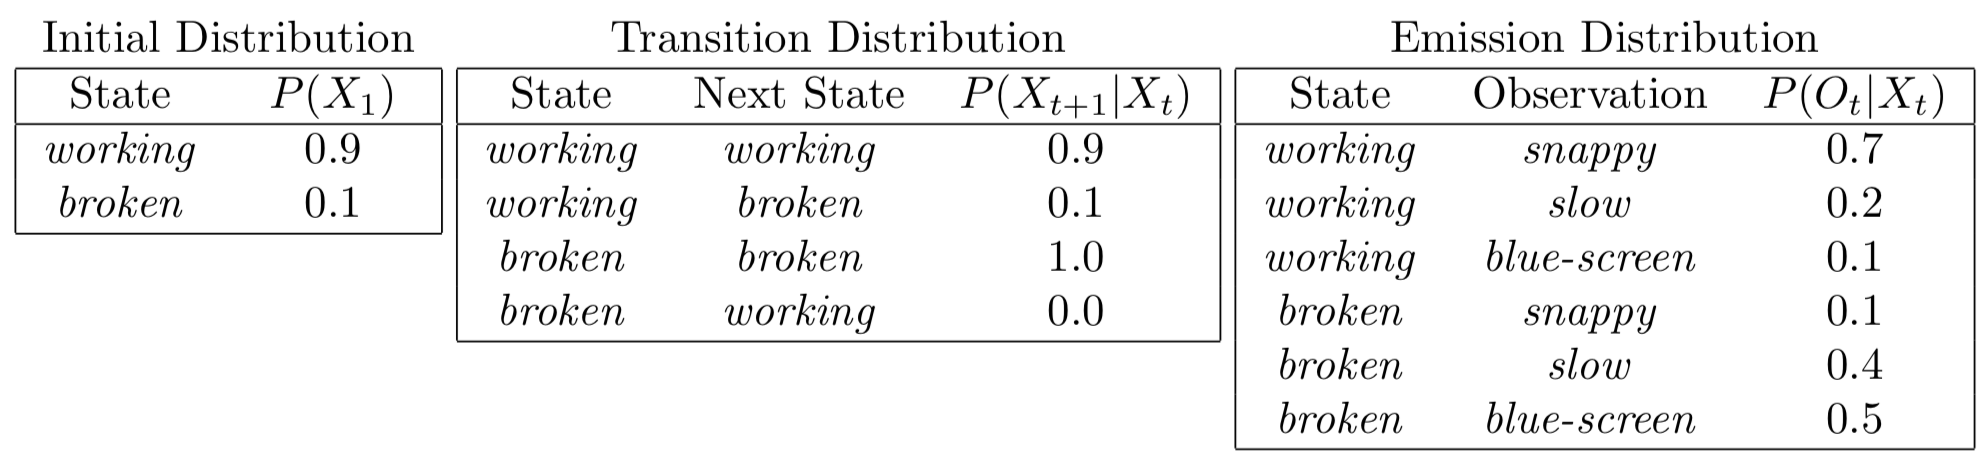


### (2a)
What is the posterior distribution of $X_1$, your computer's state on day one, given the observation (*slow*) on day 1? In other words, find $P(X_1 | E_1 = \textit{slow})$.

$\textbf{Solution:}$

$\displaystyle P(X_1 | E_1 = \textit{slow}) = \alpha \sum_{X_1} \cdot P(X_1)\cdot P(E_1= \textit{slow} | P(X_1)$

\begin{align*}
P(X_1 = \textit{working} | E_1 = \textit{slow}) &= \alpha \cdot P(X_1 = \textit{working}) \cdot P(E_1 = \textit{slow} | X_1 = \textit{working}) \\
&= \alpha \cdot (0.9) \cdot (0.2) \\
&= 0.18 \alpha
\end{align*}

\begin{align*}
P(X_1 = \textit{broken} | E_1 = \textit{slow}) &= \alpha \cdot P(X_1 = \textit{broken}) \cdot P(E_1 = \textit{slow} | X_1 = \textit{broken}) \\
&= \alpha \cdot (0.1) \cdot (0.4) \\
&= 0.04 \alpha
\end{align*}

We need $0.18\alpha + 0.04 \alpha = 1, \implies \alpha = \frac{1}{0.22}$

Thus, $\fbox{$\displaystyle P(X_1 | E_1 = \textit{slow}) = \frac{1}{.22} \langle 0.18, 0.04 \rangle = \left \langle \frac{9}{11}, \frac{2}{11} \right \rangle $}$

### (2b)
What is the posterior distribution of $X_2$, your computer's state on day two, given the observation sequence (*slow*, *slow*)?

$\textbf{Solution:}$

So our evidence is $E = [E_1 = slow, E_2 = slow]$

We want to find $P(X_2 | E_{1:2})$

Using the filtering equation/Forward process from the book (Eq. 15.5), we see that:
$P(X_{t+1} | E_{1:t+1}) = \alpha P(e_{t+1} | X_{t+1}) \sum_{X_t} P(X_{t+1} |X_t) P(X_t | E_{1:t}) $

In our specific scenario, we have:

$P(X_2 | E_{1:2}) = \alpha P(E_2 | X_2)\left [\sum_{X_1} P(X_2 | X_1) \cdot P(X_1 | E_1)\right ]$

Let $w=working$ and $b=broken$

\begin{align*}
P(X_2 = w | E_{1:2}) &= \alpha P(E_2 | X_2 = w) \left ( P(X_2 = w | X_1 = w) \cdot P(X_1 = w | E_1 = slow) \\
\hspace{40mm} + P(X_2 = w | X_1 = b) \cdot P(X_1 = b | E_1) \right ) \\
&= \alpha(0.2)\left ((0.9)\left (\frac{9}{11}\right )+(0) \left (\frac{2}{11}\right ) \right ) \\
&= 0.147 \alpha
\end{align*}


\begin{align*}
P(X_2 = b | E_{1:2}) &= \alpha P(E_2 | X_2 = b) \left ( P(X_2 = b | X_1 = w) \cdot P(X_1 = w | E_1 = slow) \\
\hspace{40mm} + P(X_2 = b | X_1 = b) \cdot P(X_1 = b | E_1) \right ) \\
&= \alpha (0.4) \left ((0.1) \left (\frac{9}{11} \right )+(1) \left (\frac{2}{11} \right ) \right ) \\
&= 0.105 \alpha
\end{align*}

Now, we want a valid probability distribution, and so we need

$0.147 \alpha + 0.105 \alpha = 1, \implies \alpha = \frac{1}{.252} $

Thus, $\fbox{$\displaystyle P(X_2 | E_{1:2}) = \frac{1}{.252} \langle 0.147, 0.105 \rangle = \left \langle 0.583, 0.417 \right \rangle $}$

<br>

---

## Problem 3: your very own MDP

For this problem, you do not need to write any code, but rather communicate your ideas clearly using complete sentences and descriptions of the concepts the questions ask about. You can, of course, include some pseudocode if it helps, but that is not strictly necessary.

### (3a)

Describe something you think would be interesting to model using a Markov decision process.  Be **creative** - do not use any examples from your homework, class, or the textbook, and if you are working with other students, please **come up with your own example**. There are so, SO many possible answers!

### (3b)

What are the states associated with your MDP?

### (3c)

What is the reward structure associated with your MDP?  Include a discussion of terminal/non-terminal states.

### (3d)

What are the actions and transition model associated with your MDP?

### (3e)

Interpret what an optimal policy represents in the context of your particular MDP.

## Unit test

In [5]:
class Tests_Problem1(unittest.TestCase):
    def setUp(self):
        nrow = 3
        ncol = 3
        default_reward = -0.2
        discount = 0.5
        terminal = {(1,3):-1, (1,2):2}
        self.mdp = MDP(nrow, ncol, terminal, default_reward, discount)
    def test_actions_some(self):
        self.assertEqual(set(self.mdp.actions((2,2))) == {'N','S','E','W'}, True)
    def test_actions_few(self):
        self.assertEqual(set(self.mdp.actions((1,1))) == {'N','E'}, True)
    def test_actions_none(self):
        self.assertEqual(set(self.mdp.actions((1,2))) == {None}, True)
    def test_reward_t(self):
        self.assertEqual(self.mdp.reward((1,2)) == 2, True)
    def test_reward_nt(self):
        self.assertEqual(self.mdp.reward((2,2)) == -0.2, True)
    def test_result_nt(self):
        self.assertEqual(self.mdp.result((1,1), 'N') == (1,2), True)